# This notebok is designed to test out our bootstrapping idea

First I will generate data around at line at 1 and then give it a sigma of 0.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
perfect_data = np.zeros(300) +1
np.random.seed(123)
noisy_data = np.random.randn(300)*0.1 + perfect_data

Mean: 0.9971 Standard Dev: 0.1027


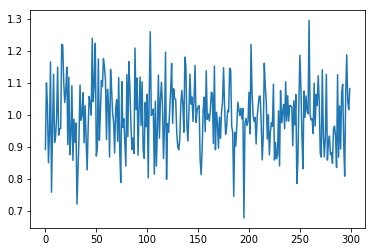

In [3]:
print("Mean: {:0.4} Standard Dev: {:0.4}".format(np.mean(noisy_data),np.std(noisy_data)))
plt.plot(noisy_data)
plt.show()

Now I will create a new data set from the old one with a similar deviation

Mean: 0.9972 Standard Dev: 0.1351


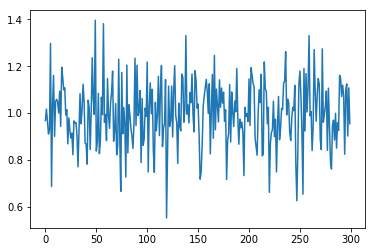

In [4]:
new_noisy_data = noisy_data + np.random.randn(300)*0.1
print("Mean: {:0.4} Standard Dev: {:0.4}".format(np.mean(new_noisy_data),np.std(new_noisy_data)))
plt.plot(new_noisy_data)
plt.show()

So we can see that the mean is still pretty good, but the Standard Deviation is about 30% worse. Let's see how this varies with the standard deviation.

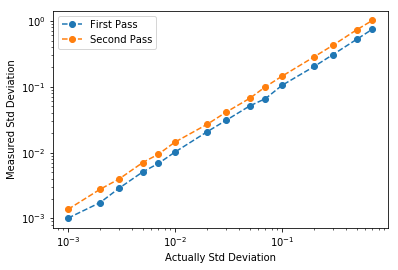

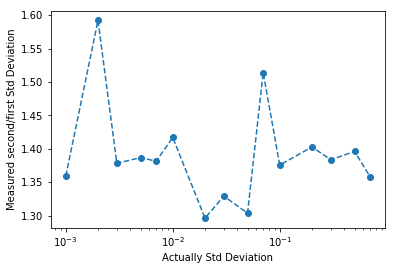

In [5]:
test_std = [0.001,0.002,0.003,0.005,0.007,0.01,0.02,0.03,0.05,0.07,0.1,0.2,0.3,0.5,0.7]

first_dev_list = list()
first_mean_list = list()
second_dev_list = list()
second_mean_list = list()

for i in range(len(test_std)):
    noisy_data = np.random.randn(300)*test_std[i] + perfect_data
    new_noisy_data = noisy_data + np.random.randn(300)*test_std[i]
    first_dev_list.append(np.std(noisy_data))
    first_mean_list.append(np.mean(noisy_data))
    second_dev_list.append(np.std(new_noisy_data))
    second_mean_list.append(np.mean(new_noisy_data))

first_dev_arr = np.array(first_dev_list)
first_mean_arr = np.array(first_mean_list)
second_dev_arr = np.array(second_dev_list)
second_mean_arr = np.array(second_mean_list)
    
plt.plot(test_std,first_dev_list,'o--',label='First Pass')
plt.plot(test_std,second_dev_list,'o--',label='Second Pass')
plt.xlabel('Actually Std Deviation')
plt.ylabel('Measured Std Deviation')
plt.legend()
plt.loglog()
plt.show()

plt.plot(test_std,second_dev_arr/first_dev_arr,'o--')
plt.xlabel('Actually Std Deviation')
plt.ylabel('Measured second/first Std Deviation')
plt.semilogx()
plt.show()

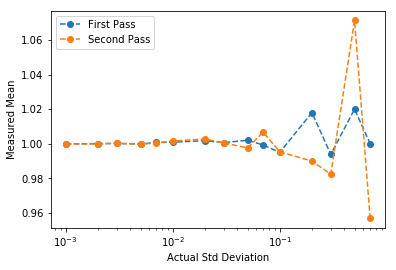

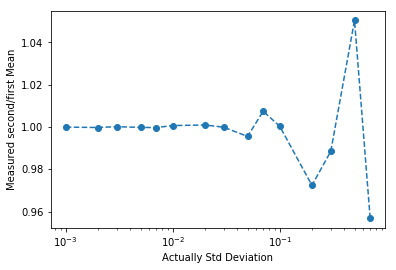

In [6]:
plt.plot(test_std,first_mean_list,'o--',label='First Pass')
plt.plot(test_std,second_mean_list,'o--',label='Second Pass')
plt.xlabel('Actual Std Deviation')
plt.ylabel('Measured Mean')
plt.legend()
plt.semilogx()
plt.show()

plt.plot(test_std,second_mean_arr/first_mean_arr,'o--')
plt.xlabel('Actually Std Deviation')
plt.ylabel('Measured second/first Mean')
plt.semilogx()
plt.show()

## Now let's try many trials

In [7]:
np.random.seed(123)
perfect_data = np.zeros(300) +1
noisy_data = np.random.randn(300)*0.1 + perfect_data

The idea here is to see if the mean on means and standard deviation of means is significantly different after 1000 trials. From the true distribution (perfect_data) and the starting point data that had noise (noisy_data).

In [8]:
def fit_data(perfect_data,noisy_data,num_trials,sigma):
    perfect_mean_list = list()
    noisy_mean_list = list()
    for i in range(num_trials):
        trialn = np.random.randn(300)*sigma + perfect_data
        perfect_mean_list.append(np.mean(trialn))
        trialn = np.random.randn(300)*sigma + noisy_data
        noisy_mean_list.append(np.mean(trialn))
    return((np.array(perfect_mean_list),np.array(noisy_mean_list)))

In [9]:
num_trials = 10000
(perfect_mean_arr,noisy_mean_arr) = fit_data(perfect_data,noisy_data,num_trials,0.1)

Perfect Mean: 0.9999 Standard Dev: 0.005857 Expected Std. Dev 0.005783
Noisy Mean: 0.9972 Standard Dev: 0.00582  Expected Std. Dev 0.005783


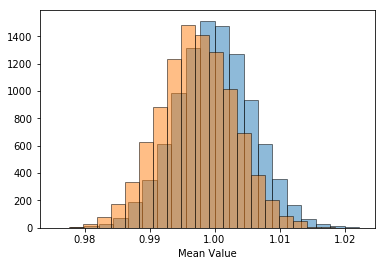

In [10]:
print("Perfect Mean: {:0.4} Standard Dev: {:0.4} Expected Std. Dev {:.04}".format(np.mean(perfect_mean_arr)
                                                                                  ,np.std(perfect_mean_arr)
                                                                                  ,0.1/np.sqrt(299)))
print("Noisy Mean: {:0.4} Standard Dev: {:0.4}  Expected Std. Dev {:.04}".format(np.mean(noisy_mean_arr)
                                                                                 ,np.std(noisy_mean_arr)
                                                                                 ,0.1/np.sqrt(299)))
plt.hist(perfect_mean_arr,bins=20,edgecolor='black',alpha=0.5)
plt.hist(noisy_mean_arr,bins=20,edgecolor='black',alpha=0.5)
plt.xlabel('Mean Value')
plt.show()

In [11]:
all_sigma_means_list = list()
all_sigma_stdev_list = list()
test_std = [0.001,0.002,0.003,0.005,0.007,0.01,0.02,0.03,0.05,0.07,0.1,0.2,0.3,0.5,0.7]
for i in range(len(test_std)):
    noisy_data = np.random.randn(300)*test_std[i] + perfect_data
    (perfect_mean_arr,noisy_mean_arr) = fit_data(perfect_data,noisy_data,num_trials,test_std[i])
    all_sigma_means_list.append(np.mean(noisy_mean_arr))
    all_sigma_stdev_list.append(np.std(noisy_mean_arr))
all_sigma_means_arr = np.array(all_sigma_means_list)
all_sigma_stdev_arr = np.array(all_sigma_stdev_list)

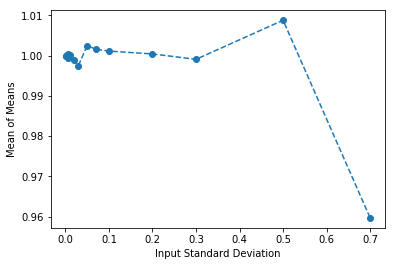

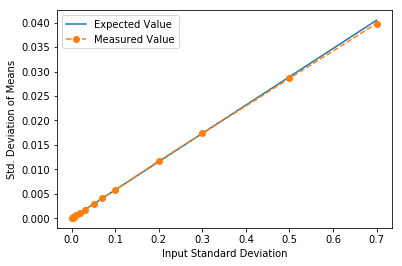

In [12]:
plt.plot(test_std,all_sigma_means_arr,'o--')
plt.ylabel("Mean of Means")
plt.xlabel("Input Standard Deviation")
plt.show()
plt.plot(test_std,test_std/np.sqrt(299),label='Expected Value')
plt.plot(test_std,all_sigma_stdev_arr,'o--',label='Measured Value')
plt.ylabel("Std. Deviation of Means")
plt.xlabel("Input Standard Deviation")
#plt.loglog()
plt.legend()
plt.show()

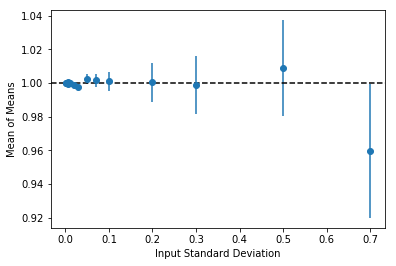

In [13]:
plt.errorbar(test_std,all_sigma_means_arr,yerr=all_sigma_stdev_arr,marker='o',linestyle='')
plt.ylabel("Mean of Means")
plt.xlabel("Input Standard Deviation")
plt.axhline(1.0,linestyle='--',color='black')
plt.show()